In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # I like this style better for plotting

In [3]:
!ls data

shipping_data.csv


First thing first, let's have a look at the dataframe.

In [4]:
df = pd.read_csv('data/shipping_data.csv')

In [5]:
df

,REFERENCE_ID,REFERENCE_CREATED_AT,REFERENCE_UPDATE_ID,DATA_UPDATED_AT,DESTINATION_PORT,ORIGIN_PORT,RAW_DESCRIPTION,EVENT_DESCRIPTION,EVENT_MODE,EVENT_LOCATION,EVENT_SOURCE,EVENT_TIMESTAMP,PLANNED,CONTAINER_ID,RELATED_VESSEL,CARRIER_NAME
0,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,03d9e401-257d-4c47-af37-a4ee52cbe58e,2024-07-15 07:01:01.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Norfolk"",\n ...","{\n ""bic_cd"": null,\n ""city"": ""Chennai"",\n ...",departure,Vessel departure from transshipment port,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Colombo"",\n ...",ais,2024-06-29 07:15:06.000 Z,False,WHLU0639965,"{\n ""imo"": ""9555101"",\n ""mmsi"": ""563172700"",...",Wan Hai
1,09dbaf79-6a76-4efd-a511-663cf9cdd1c2,2024-06-21 22:16:30.000 Z,511e6a19-f4a8-40f0-a7c4-5e1e4d5e90ca,2024-07-30 10:08:45.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Itapoa"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Shenzhen"",\n ...",berth,Vessel arrived,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Hong Kong"",\n...",ais,2024-06-18 07:44:20.000 Z,False,PIDU4240363,"{\n ""imo"": ""9793959"",\n ""mmsi"": ""477233200"",...",Pacific International Lines
2,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,03d9e401-257d-4c47-af37-a4ee52cbe58e,2024-07-15 07:01:01.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Norfolk"",\n ...","{\n ""bic_cd"": null,\n ""city"": ""Chennai"",\n ...",Inbound/Outbound Laden Ctnr Move From One Pier...,Gate out,Truck,"{\n ""bic_cd"": null,\n ""city"": null,\n ""coun...",carrier,2024-06-29 00:50:00.000 Z,False,WHLU0639965,"{\n ""imo"": null,\n ""mmsi"": null,\n ""vessel""...",Wan Hai
3,924b8c26-7f7a-419b-9d81-c4857a918b8e,2024-06-17 16:50:59.000 Z,2c5eb28d-67fb-4114-9ee3-47cafc7620f7,2024-08-12 16:34:34.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Mobile"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Rotterdam"",\n...",departure,Vessel departed,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Veracruz"",\n ...",ais,2024-06-06 11:14:46.000 Z,False,SUDU5331459,"{\n ""imo"": ""9535163"",\n ""mmsi"": ""477346500"",...",Hamburg-Süd
4,001dd4c8-ac21-4042-b762-b6650815b649,2024-06-13 07:00:23.000 Z,bb20cbf7-52b1-48c7-bf10-776dced41dea,2024-07-03 20:19:47.000 Z,"{\n ""city"": ""Savannah"",\n ""country"": ""United...","{\n ""city"": ""Shenzhen"",\n ""country"": ""China""...",Laden Ctnr Loaded On Board Vessel.(Mother Vess...,Loaded on vessel at origin port,Vessel,"{\n ""city"": ""Shenzhen"",\n ""country"": ""China""...",carrier,2024-06-15 01:12:00.000 Z,False,WHLU5809684,"{\n ""imo"": ""9555101"",\n ""mmsi"": ""563172700"",...",Wan Hai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196198,0041c459-27e8-4476-9620-d7ecf54319e8,2024-06-20 10:12:43.600 Z,06d56921-556f-47b5-8bab-70177d6c2bf5,2024-09-07 21:32:35.363 Z,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Shenzhen"",\n ...",berth,Vessel arrived,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Busan"",\n ""c...",ais,2024-07-04 11:14:31.000 Z,False,MSNU8548449,"{\n ""imo"": ""9930961"",\n ""mmsi"": ""636021667"",...",MSC
196199,0041c459-27e8-4476-9620-d7ecf54319e8,2024-06-20 10:12:43.600 Z,06d56921-556f-47b5-8bab-70177d6c2bf5,2024-09-07 21:32:35.363 Z,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Shenzhen"",\n ...",departure,Vessel departed,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Ningbo"",\n ""...",ais,2024-06-26 10:14:40.000 Z,False,MSNU8548449,"{\n ""imo"": ""9930961"",\n ""mmsi"": ""636021667"",...",MSC
196200,0041c459-27e8-4476-9620-d7ecf54319e8,2024-06-20 10:12:43.600 Z,06d56921-556f-47b5-8bab-70177d6c2bf5,2024-09-07 21:32:35.363 Z,"{\n ""bic_cd"": null,\n ""city"": ""Manaus"",\n ""...","{\n ""bic_cd"": null,\n ""city"": ""Shenzhen"",\n ...",departure,Vessel departed,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Busan"",\n ""c...",ais,2024-07-06 02:29:10.000 Z,False,MSNU8548449,"{\n ""imo"": ""9930961"",\n ""mmsi"": ""636021667"",...",MSC
196201,0041c459-2

My immediate impression is that the `reference_id` will be useful for matching up the same shipment as it gets updated. I'm going to try to sort by that to verify my understanding.

In [6]:
df.dtypes

REFERENCE_ID            object
REFERENCE_CREATED_AT    object
REFERENCE_UPDATE_ID     object
DATA_UPDATED_AT         object
DESTINATION_PORT        object
ORIGIN_PORT             object
RAW_DESCRIPTION         object
EVENT_DESCRIPTION       object
EVENT_MODE              object
EVENT_LOCATION          object
EVENT_SOURCE            object
EVENT_TIMESTAMP         object
PLANNED                 object
CONTAINER_ID            object
RELATED_VESSEL          object
CARRIER_NAME            object
dtype: object

In [7]:
print(len(df), len(df[df['PLANNED']==True]), len(df[df['PLANNED']==True])/len(df))

196203 36170 0.18434988251963527


About 20% of the events are planned, meaning they haven't occured yet, I'm planning on distinguishing between planned and actually occured throughout this exercise.

In [8]:
df['REFERENCE_ID'].nunique()

578

In [9]:
df[df['PLANNED']==False]['REFERENCE_ID'].nunique()

578

REFERENCE_ID
005f3f35-add9-45b3-9e51-c57f26a27f1a    3456
58bbae2e-03d0-4cea-8644-479d0d8281cf    3222
00424cd6-a9c7-4f4a-9277-2c9e9bf46574    2355
00805026-2aa1-4627-b585-3c2b150b51a8    2273
0041c459-27e8-4476-9620-d7ecf54319e8    2269
                                        ... 
012586a9-dc10-4172-a9a3-2d5e298c6a4b       2
0f16aa0b-12a8-4feb-91d6-fec08f7bd203       1
006fd8eb-411d-434a-86a5-d2c3ae900e91       1
00b5ebeb-bea0-41d2-bac2-264ff4bf3094       1
01799592-657a-48fc-b876-01d3b2810182       1
Name: count, Length: 578, dtype: int64


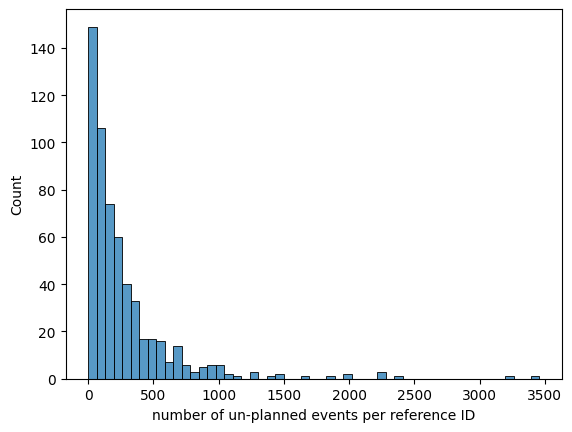

In [10]:
repeated_refs = df[df['PLANNED']==False]['REFERENCE_ID'].value_counts()
print(repeated_refs)
sns.histplot(repeated_refs)
plt.xlabel('number of un-planned events per reference ID')
plt.show()

There are 578 unique reference IDs. And some of these have up to 3000-ish unplanned (actually occuring) updates.

### Task 1:

There are eight core events expected to occur for each journey identified by “reference_id”. What are the rates for how often these events are present for each shipment? You may need to consider whether the container journey is completed for more recent shipments.

- overall
- overall per ocean carrier
- per each of the 8 core events overall
- per each of the 8 core events per ocean carrier

To get an idea of how to scale this sort of question, I'll first look at just the first reference ID.

In [12]:
first_id = df[df['REFERENCE_ID'] == '07bedccb-b83f-4d87-bc55-8ad54b9755c1']

In [13]:
first_id

,REFERENCE_ID,REFERENCE_CREATED_AT,REFERENCE_UPDATE_ID,DATA_UPDATED_AT,DESTINATION_PORT,ORIGIN_PORT,RAW_DESCRIPTION,EVENT_DESCRIPTION,EVENT_MODE,EVENT_LOCATION,EVENT_SOURCE,EVENT_TIMESTAMP,PLANNED,CONTAINER_ID,RELATED_VESSEL,CARRIER_NAME
0,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,03d9e401-257d-4c47-af37-a4ee52cbe58e,2024-07-15 07:01:01.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Norfolk"",\n ...","{\n ""bic_cd"": null,\n ""city"": ""Chennai"",\n ...",departure,Vessel departure from transshipment port,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Colombo"",\n ...",ais,2024-06-29 07:15:06.000 Z,False,WHLU0639965,"{\n ""imo"": ""9555101"",\n ""mmsi"": ""563172700"",...",Wan Hai
2,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,03d9e401-257d-4c47-af37-a4ee52cbe58e,2024-07-15 07:01:01.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Norfolk"",\n ...","{\n ""bic_cd"": null,\n ""city"": ""Chennai"",\n ...",Inbound/Outbound Laden Ctnr Move From One Pier...,Gate out,Truck,"{\n ""bic_cd"": null,\n ""city"": null,\n ""coun...",carrier,2024-06-29 00:50:00.000 Z,False,WHLU0639965,"{\n ""imo"": null,\n ""mmsi"": null,\n ""vessel""...",Wan Hai
129,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,03d9e401-257d-4c47-af37-a4ee52cbe58e,2024-07-15 07:01:01.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Norfolk"",\n ...","{\n ""bic_cd"": null,\n ""city"": ""Chennai"",\n ...",Laden Or Empty Transit Container Discharged Fr...,Discharged from vessel at transshipment port,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Colombo"",\n ...",carrier,2024-06-28 19:56:00.000 Z,False,WHLU0639965,"{\n ""imo"": null,\n ""mmsi"": null,\n ""vessel""...",Wan Hai
134,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,03d9e401-257d-4c47-af37-a4ee52cbe58e,2024-07-15 07:01:01.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Norfolk"",\n ...","{\n ""bic_cd"": null,\n ""city"": ""Chennai"",\n ...",Empty Container Released To Shipper From Pier/...,Gate out from origin port,Truck,"{\n ""bic_cd"": null,\n ""city"": ""Chennai"",\n ...",carrier,2024-06-15 15:06:00.000 Z,False,WHLU0639965,"{\n ""imo"": null,\n ""mmsi"": null,\n ""vessel""...",Wan Hai
340,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,03d9e401-257d-4c47-af37-a4ee52cbe58e,2024-07-15 07:01:01.000 Z,"{\n ""bic_cd"": null,\n ""city"": ""Norfolk"",\n ...","{\n ""bic_cd"": null,\n ""city"": ""Chennai"",\n ...",Laden Ctnr Loaded On Board Vessel.(Mother Vess...,Loaded on vessel at transshipment port,Vessel,"{\n ""bic_cd"": null,\n ""city"": ""Colombo"",\n ...",carrier,2024-06-28 22:21:00.000 Z,False,WHLU0639965,"{\n ""imo"": ""9555101"",\n ""mmsi"": ""563172700"",...",Wan Hai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175092,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,729bec92-bab8-45ba-b332-cfd735120818,2024-06-24 08:11:39.000 Z,"{\n ""city"": ""Norfolk"",\n ""country"": ""United ...","{\n ""city"": ""Chennai"",\n ""country"": ""India"",...",Outbound Full Container Gate In To Peir/Termin...,Gate in at origin port,Truck,"{\n ""city"": ""Chennai"",\n ""country"": ""India"",...",carrier,2024-06-18 20:38:00.000 Z,False,WHLU0639965,"{\n ""voyage"": ""TK""\n}",Wan Hai
175240,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,729bec92-bab8-45ba-b332-cfd735120818,2024-06-24 08:11:39.000 Z,"{\n ""city"": ""Norfolk"",\n ""country"": ""United ...","{\n ""city"": ""Chennai"",\n ""country"": ""India"",...",Estimated time of arrival,Vessel arrival at transshipment port,Vessel,"{\n ""city"": ""Colombo"",\n ""country"": ""Sri Lan...",carrier,2024-06-26 18:30:00.000 Z,True,WHLU0639965,"{\n ""imo"": ""9793727"",\n ""mmsi"": ""563071300"",...",Wan Hai
175312,07bedccb-b83f-4d87-bc55-8ad54b9755c1,2024-06-19 07:00:14.000 Z,729bec92-bab8-45ba-b332-cfd735120818,2024-06-24 08:11:39.000 Z,"{\n ""city"": ""Norfolk"",\n ""country"": ""United ...","{\n ""city"": ""Chennai"",\n ""country"": ""India"",...",Estimated time of departure,Ves

Look at event description for these 87 entries.

In [16]:
first_id[['EVENT_DESCRIPTION', 'EVENT_MODE', 'PLANNED', 'CARRIER_NAME']]

,EVENT_DESCRIPTION,EVENT_MODE,PLANNED,CARRIER_NAME
0,Vessel departure from transshipment port,Vessel,False,Wan Hai
2,Gate out,Truck,False,Wan Hai
129,Discharged from vessel at transshipment port,Vessel,False,Wan Hai
134,Gate out from origin port,Truck,False,Wan Hai
340,Loaded on vessel at transshipment port,Vessel,False,Wan Hai
...,...,...,...,...
175092,Gate in at origin port,Truck,False,Wan Hai
175240,Vessel arrival at transshipment port,Vessel,True,Wan Hai
175312,Vessel departure from origin port,Vessel,True,Wan Hai
175335,Loaded on vessel at origin port,Vessel,False,Wan Hai


Okay some of these are true in the planned column, meaning for those entries they hadn't happened yet. I'm going to filter for false to only get things that have happened.

In [20]:
first_id_true = first_id[first_id['PLANNED'] == False]

In [21]:
first_id_true['EVENT_DESCRIPTION'].value_counts()

EVENT_DESCRIPTION
Gate out from origin port                       12
Gate in at origin port                          12
Loaded on vessel at origin port                 11
Discharged from vessel at transshipment port     6
Vessel arrived                                   5
Vessel departure from transshipment port         2
Gate out                                         2
Loaded on vessel at transshipment port           2
Vessel arrival at transshipment port             2
Name: count, dtype: int64

The 8 core events:
- Gate out from origin port
- Gate in at origin port
- Loaded on vessel at origin port
- Vessel departure from origin port
- Vessel arrived at destination port
- Discharged from vessel at destination port
- Gate out from destination port
- Gate in empty return

So this specific reference id includes three core events related to the origin port. There are additional events that happen, but these are the three we're interested in. Let's return and look at the full dataframe with all reference IDs, but only look at the rates of events that have transpired:

In [22]:
df_past = df[df['PLANNED'] == False]

Look at all entries for this `EVENT_DESCRIPTION` column to make sure there aren't typos.

In [32]:
# Convert the value counts to a string and print the entire list without truncation
pd.set_option('display.max_rows', None)  # Ensure all rows are shown

df_past['EVENT_DESCRIPTION'].value_counts()

EVENT_DESCRIPTION
Vessel departed                                            28878
Vessel arrived                                             28842
Vessel departure from origin port                          19301
Loaded on vessel at origin port                            11504
Gate in at origin port                                     10780
Gate out from origin port                                   8947
Vessel arrived at destination port                          6344
Vessel departure from transshipment port                    5937
Vessel arrival at transshipment port                        5876
Loaded on vessel at transshipment port                      3711
Discharged from vessel at transshipment port                3566
Discharged from vessel at destination port                  3325
Gate out from destination port                              2774
Gate out empty                                              2651
Loaded on rail                                              1594
Gate in

Looks good enough to go ahead and filter for the core events. Set back to only displaying 10 entries per df.

In [24]:
pd.set_option('display.max_rows', 10)
core_events = ['Gate out from origin port',
               'Gate in at origin port',
               'Loaded on vessel at origin port',
               'Vessel departure from origin port',
               'Vessel arrived at destination port',
               'Discharged from vessel at destination port',
               'Gate out from destination port',
               'Gate in empty return']
filtered_df = df_past[df_past['EVENT_DESCRIPTION'].isin(core_events)]

In [36]:
print('len before', len(df_past), 'len after filtering for only 8 core events', len(filtered_df))
print(filtered_df['EVENT_DESCRIPTION'].value_counts())

len before 159834 len after filtering for only 8 core events 64330
EVENT_DESCRIPTION
Vessel departure from origin port             19301
Loaded on vessel at origin port               11504
Gate in at origin port                        10780
Gate out from origin port                      8947
Vessel arrived at destination port             6344
Discharged from vessel at destination port     3325
Gate out from destination port                 2774
Gate in empty return                           1355
Name: count, dtype: int64


We need to know how often these events are present for each shipment. 

I'd like to look at the event rate per reference ID. Use groupby to organize by `REFERENCE_ID` and `EVENT_DESCRIPTION`. Then calculate the number of times that event occurs for that reference ID. Also calculate the rate of how often the event is present for each shipment (compared to the other core events).

In [42]:
def calc_rate(df):
    event_counts = df.groupby(['REFERENCE_ID', 'EVENT_DESCRIPTION']).size().reset_index(name='event_count')
    total_events = df.groupby('REFERENCE_ID').size().reset_index(name='total_events')
    merged_df = pd.merge(event_counts, total_events, on='REFERENCE_ID')
    merged_df['rate'] = merged_df['event_count'] / merged_df['total_events']
    return merged_df

In [51]:
merged_df = calc_rate(filtered_df)

If we want to know overall rates, average by event across all reference IDs.

In [39]:
average_rates = merged_df.groupby('EVENT_DESCRIPTION')['rate'].mean().reset_index()
average_rates = average_rates.rename(columns={'rate': 'average_rate'})
print(average_rates)

                            EVENT_DESCRIPTION  average_rate
0  Discharged from vessel at destination port      0.083455
1                      Gate in at origin port      0.200534
2                        Gate in empty return      0.063636
3              Gate out from destination port      0.068517
4                   Gate out from origin port      0.186446
5             Loaded on vessel at origin port      0.194014
6          Vessel arrived at destination port      0.138228
7           Vessel departure from origin port      0.306831


If I also want to reconsider just looking at shipments that have completed (which I'm assuming the final event is `Gate in empty return`) I can first restrict to reference IDs that have this listed and then filter only for events in the core events and then rerun the rate calculation.

In [49]:
gate_in_ids = df_past[df_past['EVENT_DESCRIPTION'] == 'Gate in empty return']['REFERENCE_ID'].unique()
filtered_df_gate_in = df_past[df_past['REFERENCE_ID'].isin(gate_in_ids)]
done_shipping = filtered_df_gate_in[filtered_df_gate_in['EVENT_DESCRIPTION'].isin(core_events)]
rate_done_shipping = calc_rate(done_shipping)

In [50]:
average_rates = rate_done_shipping.groupby('EVENT_DESCRIPTION')['rate'].mean().reset_index()
average_rates = average_rates.rename(columns={'rate': 'average_rate'})
print(average_rates)

                            EVENT_DESCRIPTION  average_rate
0  Discharged from vessel at destination port      0.081076
1                      Gate in at origin port      0.181838
2                        Gate in empty return      0.063636
3              Gate out from destination port      0.065650
4                   Gate out from origin port      0.175737
5             Loaded on vessel at origin port      0.183321
6          Vessel arrived at destination port      0.141451
7           Vessel departure from origin port      0.290508


Pretty similar to the results above.

To segment this up by ocean carrier, 

In [52]:
def calc_rate_ocean_carrier(df):
    event_counts = df.groupby(['REFERENCE_ID', 'CARRIER_NAME', 'EVENT_DESCRIPTION']).size().reset_index(name='event_count')
    total_events = df.groupby('REFERENCE_ID').size().reset_index(name='total_events')
    merged_df = pd.merge(event_counts, total_events, on='REFERENCE_ID')
    merged_df['rate'] = merged_df['event_count'] / merged_df['total_events']
    return merged_df

In [54]:
carrier = calc_rate_ocean_carrier(done_shipping)

In [56]:
average_rates = carrier.groupby('CARRIER_NAME')['rate'].mean().reset_index()
average_rates = average_rates.rename(columns={'rate': 'average_rate'})
print(average_rates)

   CARRIER_NAME  average_rate
0           ANL      0.126437
1           APL      0.133333
2       CMA-CGM      0.132075
3         COSCO      0.185185
4   Hapag Lloyd      0.136364
..          ...           ...
16      Sealand      0.142857
17      Sinokor      0.185484
18      Wan Hai      0.179487
19    Yang Ming      0.129032
20          ZIM      0.136364

[21 rows x 2 columns]
